<a href="https://colab.research.google.com/github/ocoropuj/Econ-424/blob/main/ECON_424_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
def format_with_dollar(df):
    return df.applymap(lambda x: f"${x:,.2f}")


# Disclaimer: This code uses python, and gets the data directly from Yahoo Finance. The monthly data is taken as the last avaiable data point from each month. It is possible that if the custom R library, the monthly data is achieveed diferently, some numbers might be slightly off.

# Introduction

In this HW, you will use the commands in HW1 to download data and then estimate the GWN model for the monthly return data of five Northwest stocks: Amazon (amzn), Boeing (ba), Costco (cost), Nordstrom (jwn), and Starbucks (sbux).  Instead of using data in **IntroCompFin** package, you will download your own data from https://finance.yahoo.com.

This notebook walks you through all of the computations for the lab. You will use the following R packages

* **IntroCompFinR**
* **PerformanceAnalytics package**.
* **zoo**
* **xts**

Make sure to install these packages before you load them into R. As in the previous labs, use this notebook to answer all questions. Insert R chunks where needed. I will provide code hints below.

## Reading

* Zivot, chapters 6 (GWN Model) and 7 (GWN Model Estimation)  Note the earlier version of the text refers to the GWN Model as the CER (Constant Expected Return) Model.

# Loading data and computing returns

For Amazon (amzn), Boeing (ba), Costco (cost), Nordstrom (jwn), and Starbucks (sbux): load the daily price data from https://finance.yahoo.com,
and create monthly returns over the period 01/01/2001 through 01/01/2024.

Do this by:
1) Download the data for AMZN from yahoo (see instruction on Canvas), open the downloaded .csv file to make sure its format looks similar to the provided data for the other 4 stocks.


In [ ]:
# Define the stock symbols
stocks = ['AMZN', 'BA', 'COST', 'JWN', 'SBUX']
start_date = '2001-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame for storing adjusted close prices
adj_close_prices = pd.DataFrame()

# Download and process stock data
for stock in stocks:
    data = yf.download(stock, start=start_date, end=end_date)
    adj_close = data[['Adj Close']].rename(columns={'Adj Close': stock})
    adj_close_prices = pd.concat([adj_close_prices, adj_close], axis=1)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
format_with_dollar(adj_close_prices)

,AMZN,BA,COST,JWN,SBUX
Date,,,,,
2001-01-02,$0.69,$40.51,$27.78,$5.12,$4.11
2001-01-03,$0.88,$40.88,$28.79,$5.53,$4.23
2001-01-04,$0.77,$39.85,$29.42,$5.70,$4.02
2001-01-05,$0.73,$38.38,$27.87,$5.28,$4.08
2001-01-08,$0.75,$38.55,$28.29,$5.19,$4.15
...,...,...,...,...,...
2023-12-22,$153.42,$260.44,$655.70,$18.42,$94.71
2023-12-26,$153.41,$262.79,$658.65,$18.75,$95.10
2023-12-27,$153.34,$262.10,$665.82,$18.91,$94.72


In [ ]:
monthly_data = adj_close_prices.resample('M').ffill()
monthly_data.index = monthly_data.index.strftime('%B %Y')


In [ ]:
format_with_dollar(monthly_data)

,AMZN,BA,COST,JWN,SBUX
Date,,,,,
January 2001,$0.87,$38.22,$31.20,$5.71,$4.88
February 2001,$0.51,$40.76,$28.16,$5.19,$4.65
March 2001,$0.51,$36.51,$26.47,$4.58,$4.15
April 2001,$0.79,$40.50,$23.56,$5.17,$3.78
May 2001,$0.83,$41.32,$26.24,$5.24,$3.82
...,...,...,...,...,...
August 2023,$138.01,$224.03,$535.30,$16.02,$96.33
September 2023,$127.12,$191.68,$550.58,$14.75,$90.23
October 2023,$133.09,$186.82,$538.38,$13.80,$91.19


In [ ]:
# Calculate monthly continuously compounded returns
monthly_returns = np.log(monthly_data).diff().dropna()

In [ ]:
monthly_returns

,AMZN,BA,COST,JWN,SBUX
Date,,,,,
February 2001,-0.530267,0.064330,-0.102362,-0.095207,-0.047415
March 2001,0.004163,-0.110195,-0.061748,-0.125127,-0.115325
April 2001,0.433419,0.103744,-0.116605,0.121869,-0.092193
May 2001,0.056066,0.020118,0.107905,0.012448,0.008748
June 2001,-0.165095,-0.123204,0.054270,0.001079,0.164055
...,...,...,...,...,...
August 2023,0.031877,-0.064056,-0.018636,-0.341703,-0.036193
September 2023,-0.082195,-0.155953,0.028147,-0.082203,-0.065415
October 2023,0.045894,-0.025682,-0.022410,-0.066414,0.010572


# Part I: GWN Model Estimation

Consider the GWN Model for cc returns

\begin{align}
R_{it} & = \mu_i + \epsilon_{it}, t=1,\cdots,T \\
\epsilon_{it} & \sim \text{iid } N(0, \sigma_{i}^{2}) \\
\mathrm{cov}(R_{it}, R_{jt}) & = \sigma_{i,j} \\
\mathrm{cov}(R_{it}, R_{js}) & = 0 \text{ for } s \ne t
\end{align}

where $R_{it}$ denotes the cc return on asset $i$ ($i=\mathrm{AMZN}, \cdots, \mathrm{SBUX}$).

1. Using sample descriptive statistics, give estimates for the model parameters $\mu_i, \sigma_{i}^{2}, \sigma_i, \sigma_{i,j}, \rho_{i,j}$.



In [ ]:
# Step 1: Calculate mean returns for each stock
mu_i = monthly_returns.mean()

# Step 2: Calculate variance and standard deviation for each stock
sigma_i_squared = monthly_returns.var()
sigma_i = np.sqrt(sigma_i_squared)

# Step 3: Calculate covariance between each pair of stocks
sigma_ij = monthly_returns.cov()

# Step 4: Calculate correlation coefficient between each pair of stocks
rho_ij = monthly_returns.corr()

# Output the calculated parameters
print("Mean Returns (mu_i):\n", mu_i)
print("\nVariance (sigma_i_squared):\n", sigma_i_squared)
print("\nStandard Deviation (sigma_i):\n", sigma_i)
print("\nCovariance (sigma_ij):\n", sigma_ij)
print("\nCorrelation Coefficient (rho_ij):\n", rho_ij)

Mean Returns (mu_i):
 AMZN    0.018792
BA      0.006981
COST    0.011093
JWN     0.004267
SBUX    0.010811
dtype: float64

Variance (sigma_i_squared):
 AMZN    0.014728
BA      0.009673
COST    0.003481
JWN     0.017950
SBUX    0.006500
dtype: float64

Standard Deviation (sigma_i):
 AMZN    0.121357
BA      0.098353
COST    0.059004
JWN     0.133979
SBUX    0.080625
dtype: float64

Covariance (sigma_ij):
           AMZN        BA      COST       JWN      SBUX
AMZN  0.014728  0.003245  0.002520  0.005165  0.003127
BA    0.003245  0.009673  0.001667  0.006435  0.002557
COST  0.002520  0.001667  0.003481  0.002571  0.002113
JWN   0.005165  0.006435  0.002571  0.017950  0.004388
SBUX  0.003127  0.002557  0.002113  0.004388  0.006500

Correlation Coefficient (rho_ij):
           AMZN        BA      COST       JWN      SBUX
AMZN  1.000000  0.271829  0.351928  0.317635  0.319599
BA    0.271829  1.000000  0.287281  0.488358  0.322511
COST  0.351928  0.287281  1.000000  0.325287  0.444207
JWN  

2. For each estimate of the above parameters (except $\sigma_{i,j}$) compute the estimated standard error. That is, compute $\widehat{\mathrm{SE}}(\hat{\mu}_{i})$, $\widehat{\mathrm{SE}}(\hat{\sigma}_{i}^{2})$, $\widehat{\mathrm{SE}}(\hat{\sigma}_{i})$, and $\widehat{\mathrm{SE}}(\hat{\rho}_{ij})$. Briefly comment on the precision of the estimates. Hint: the formulas for these standard errors were given in class, and are given in the lecture notes on the constant expected return model.

We Define:
$$\hat{SE}(\mu_i)=\frac{\hat{\sigma}}{\sqrt{T}}$$

$$\hat{SE}(\sigma_i^2)=\frac{\hat{\sigma}^2}{\sqrt{T/2}}$$

$$\hat{SE}(\sigma_i)=\frac{\hat{\sigma}}{\sqrt{2T}}$$

$$\hat{SE}(\sigma_{ij})=\sqrt{\frac{\hat{\sigma_i} \hat{\sigma_j} - \hat{\sigma_{ij}}}{T}}$$

$$\hat{SE}(\rho_{ij})=\frac{1-\hat{\rho_{ij}}^2}{\sqrt{T-2}}$$

In [ ]:
# @title Calculations
# T is the number of observations (months)
T = monthly_returns.shape[0]

# Calculate mean returns, variances, and standard deviations
mu_i = monthly_returns.mean()
sigma_i_squared = monthly_returns.var()
sigma_i = monthly_returns.std()

# Calculate the covariance and correlation matrices
sigma_ij = monthly_returns.cov()
rho_ij = monthly_returns.corr()

# Compute standard errors for each parameter
SE_mu_i = sigma_i / np.sqrt(T)
SE_sigma_i_squared = sigma_i_squared / np.sqrt(T / 2)
SE_sigma_i = sigma_i / np.sqrt(2 * T)

# For SE_rho_ij, it's a bit more involved as we need to do it for each pair
SE_rho_ij = (1 - rho_ij**2) / np.sqrt(T - 2)


In [ ]:
# Printing out the standard errors for demonstration
print("Standard Error of Mean Returns (SE_mu_i):\n", SE_mu_i)
print("\nStandard Error of Variances (SE_sigma_i_squared):\n", SE_sigma_i_squared)
print("\nStandard Error of Standard Deviations (SE_sigma_i):\n", SE_sigma_i)
print("\nStandard Error of Correlation Coefficients (SE_rho_ij):\n", SE_rho_ij)

Standard Error of Mean Returns (SE_mu_i):
 AMZN    0.007318
BA      0.005931
COST    0.003558
JWN     0.008079
SBUX    0.004862
dtype: float64

Standard Error of Variances (SE_sigma_i_squared):
 AMZN    0.001256
BA      0.000825
COST    0.000297
JWN     0.001531
SBUX    0.000554
dtype: float64

Standard Error of Standard Deviations (SE_sigma_i):
 AMZN    0.005175
BA      0.004194
COST    0.002516
JWN     0.005713
SBUX    0.003438
dtype: float64

Standard Error of Correlation Coefficients (SE_rho_ij):
           AMZN        BA      COST       JWN      SBUX
AMZN  0.000000  0.056051  0.053027  0.054416  0.054341
BA    0.056051  0.000000  0.055528  0.046088  0.054228
COST  0.053027  0.055528  0.000000  0.054119  0.048580
JWN   0.054416  0.046088  0.054119  0.000000  0.050536
SBUX  0.054341  0.054228  0.048580  0.050536  0.000000


3. For each parameter $\mu_i, \sigma_{i}^{2}, \sigma_i, \rho_{i,j}$ compute 95% and 99% confidence intervals. Briefly comment on the width of these intervals.



In [ ]:
# Critical z-values for 95% and 99% confidence intervals
z_95 = stats.norm.ppf(0.975)  # Two-tailed: 0.025 on each side
z_99 = stats.norm.ppf(0.995)  # Two-tailed: 0.005 on each side

# Compute confidence intervals
def compute_ci(mean, SE, z):
    return mean - z * SE, mean + z * SE

# Initialize dictionaries to store CIs
ci_95 = {}
ci_99 = {}

# Compute confidence intervals for each parameter
parameters = ['mu_i', 'sigma_i_squared', 'sigma_i']
for param in parameters:
        mean = eval(param)  # Dynamically get the mean values
        SE = eval(f"SE_{param}")  # Dynamically get the SE values
        ci_95[param] = compute_ci(mean, SE, z_95)
        ci_99[param] = compute_ci(mean, SE, z_99)

# Print CIs in structured format
for param in parameters:
        print(f'{param}')
        ci_data_95 = pd.DataFrame(ci_95[param], index=['Lower', 'Higher']).T
        ci_data_95['Difference'] = ci_data_95['Higher'] - ci_data_95['Lower']
        ci_data_99 = pd.DataFrame(ci_99[param], index=['Lower', 'Higher']).T
        ci_data_99['Difference'] = ci_data_99['Higher'] - ci_data_99['Lower']
        print("95% CI:")
        print(ci_data_95)
        print("99% CI:")
        print(ci_data_99)
        print("\n")

mu_i
95% CI:
         Lower    Higher  Difference
AMZN  0.004449  0.033135    0.028687
BA   -0.004643  0.018606    0.023249
COST  0.004119  0.018067    0.013947
JWN  -0.011568  0.020102    0.031670
SBUX  0.001282  0.020340    0.019058
99% CI:
         Lower    Higher  Difference
AMZN -0.000058  0.037642    0.037700
BA   -0.008296  0.022258    0.030554
COST  0.001928  0.020258    0.018330
JWN  -0.016543  0.025078    0.041621
SBUX -0.001712  0.023335    0.025047


sigma_i_squared
95% CI:
         Lower    Higher  Difference
AMZN  0.012266  0.017189    0.004923
BA    0.008056  0.011290    0.003234
COST  0.002900  0.004063    0.001164
JWN   0.014950  0.020951    0.006001
SBUX  0.005414  0.007587    0.002173
99% CI:
         Lower    Higher  Difference
AMZN  0.011492  0.017963    0.006470
BA    0.007548  0.011798    0.004250
COST  0.002717  0.004246    0.001530
JWN   0.014007  0.021893    0.007886
SBUX  0.005072  0.007928    0.002856


sigma_i
95% CI:
         Lower    Higher  Difference
AM

In [ ]:
# Define a function to compute the confidence interval
def compute_ci(mean, SE, z):
    lower = mean - z * SE
    higher = mean + z * SE
    return lower, higher, higher - lower

# Extract the stock symbols for iteration
stocks = rho_ij.columns

# Prepare a list to hold the rows before creating DataFrame
ci_rows = []

# Iterate over each unique stock pair
for i in range(len(stocks)):
    for j in range(i + 1, len(stocks)):  # Ensure j > i to get lower triangle
        pair = f"{stocks[i]} & {stocks[j]}"
        rho_mean = rho_ij.iloc[i, j]
        SE = SE_rho_ij.iloc[i, j]

        # Compute 95% CI
        lower_95, higher_95, diff_95 = compute_ci(rho_mean, SE, z_95)

        # Compute 99% CI
        lower_99, higher_99, diff_99 = compute_ci(rho_mean, SE, z_99)

        # Append results to the list
        ci_rows.append({
            'Pair': pair,
            '95% CI Lower': lower_95,
            '95% CI Higher': higher_95,
            '95% CI Difference': diff_95,
            '99% CI Lower': lower_99,
            '99% CI Higher': higher_99,
            '99% CI Difference': diff_99
        })

# Convert list of dicts to DataFrame
ci_results = pd.DataFrame(ci_rows)

# Print the results
print(ci_results.to_string(index=False))

       Pair  95% CI Lower  95% CI Higher  95% CI Difference  99% CI Lower  99% CI Higher  99% CI Difference
  AMZN & BA      0.161972       0.381687           0.219715      0.127452       0.416206           0.288754
AMZN & COST      0.247998       0.455859           0.207861      0.215340       0.488516           0.273176
 AMZN & JWN      0.210980       0.424289           0.213309      0.177467       0.457802           0.280335
AMZN & SBUX      0.213093       0.426105           0.213012      0.179627       0.459572           0.279945
  BA & COST      0.178448       0.396113           0.217665      0.144251       0.430311           0.286060
   BA & JWN      0.398027       0.578690           0.180663      0.369642       0.607074           0.237432
  BA & SBUX      0.216227       0.428796           0.212568      0.182831       0.462192           0.279362
 COST & JWN      0.219216       0.431358           0.212142      0.185886       0.464687           0.278801
COST & SBUX      0.348991   

The differences between the higher and lower bounds of the confidence intervals for mean returns are relatively narrow for some stocks and wider for others. For example, AMZN shows a relatively wide interval in both the 95% and 99% CIs compared to COST, suggesting that the estimate of AMZN's mean return is less precise or more volatile over the period studied.

The variance and standard deviation confidence intervals highlight the comparative volatility among the stocks. Stocks like JWN with wider intervals for these parameters are more volatile, implying higher risk for investors.

The confidence intervals for correlation coefficients show significant variability, which could impact portfolio diversification strategies, and make our Markowitz model less useful.

Utilizing the historical Confidence intervals (not necessairly assuming normality of the underlying distributions)
As expected the lenght of the 99% CI is the same or larger than the 95% CI.

The intervals for mean returns ($\mu_i$ ) suggest that there's a significant range within which the true mean returns could fall, indicating a notable uncertainty in the expected returns. This is typical for stock returns, which can be highly variable.

A similar thing happens for the intervals of $\sigma_i$ and $\sigma^2_i$ in which they highly deviate, and imply that the standard deviation is not constant implying that the process is not stationary.


4. Using the estimated values of $\mu_i$ and $\sigma_i$ for each stock, compute the normal distribution 1% and 5% monthly value-at-Risk (VaR) based on an initial $100,000 investment. Compare these values with the historical VaR values computed from the empirical quantiles. •	Hint: remember that we are using continuously compounded returns.



In [ ]:
# @title Calculate VaR
# Initial investment
P = 100000

# Z-scores for 1% and 5% confidence levels
z_1 = stats.norm.ppf(0.01)
z_5 = stats.norm.ppf(0.05)

# Compute historical VaR
VaR_historical_1 = monthly_returns.quantile(0.01) * P
VaR_historical_5 = monthly_returns.quantile(0.05) * P

VaR_normal_1 = {}
VaR_normal_5 = {}
for i, stock in enumerate(mu_i.index):
    VaR_normal_1[stock] = (mu_i[i] + z_1 * sigma_i[i]) * P
    VaR_normal_5[stock] = (mu_i[i] + z_5 * sigma_i[i]) * P

# Create DataFrame to compare VaR
VaR_comparison = pd.DataFrame({
    'Historical VaR at 1%': VaR_historical_1,
    'Historical VaR at 5%': VaR_historical_5,
    'Normal Distribution VaR at 1%': pd.Series(VaR_normal_1),
    'Normal Distribution VaR at 5%': pd.Series(VaR_normal_5)
})


In [ ]:
formatted_var_comparison_df = format_with_dollar(VaR_comparison)

formatted_var_comparison_df

,Historical VaR at 1%,Historical VaR at 5%,Normal Distribution VaR at 1%,Normal Distribution VaR at 5%
AMZN,"$-34,232.11","$-17,708.05","$-26,352.75","$-18,082.32"
BA,"$-28,200.75","$-13,415.58","$-22,182.13","$-15,479.46"
COST,"$-14,050.20","$-10,427.78","$-12,617.03","$-8,595.95"
JWN,"$-36,858.19","$-18,960.67","$-30,741.37","$-21,610.80"
SBUX,"$-20,771.90","$-12,334.71","$-17,675.09","$-12,180.53"


# Part II: Monte Carlo Simulation in the GWN Model

Using the technique of Monte Carlo simulation, create $1000$ simulated data sets of size $T = 200$ from the GWN model using as true parameters the estimated parameters for AMZN: $\hat{\mu} = 0.01857$, $\hat{\sigma}^2 = 0.01499$, and $\hat{\sigma} = 0.1224$.  Use `set.seed(123)` to initialize the random number generator. For each of the $1000$ data sets, compute $\hat{\mu}$, $\hat{\sigma^2}$ and $\hat{\sigma}$ using the R functions `mean()` and `var()` and `sd()`.

5. Create histograms for the 1000 values of $\hat{\mu}$, $\hat{\sigma}^2$, and $\hat{\sigma}$ . Are the centers of these histograms close to the true values $\hat{\mu} = 0.01857$, $\hat{\sigma}^2 = 0.01499$, and $\hat{\sigma} = 0.1224$? Do the distributions look normal?



In [ ]:
mu = 0.01857
sigma_squared = 0.01499
sigma = 0.1224

size = 1000
T = 200

In [ ]:
Random_sets = np.zeros((T, size))
np.random.seed(123)
for i in range(T):
    Random_sets[i] = np.random.normal(loc=mu, scale=sigma, size=size)


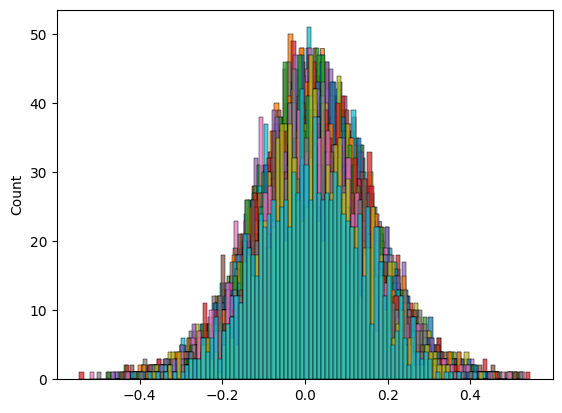

In [ ]:
for random_set in Random_sets:
    sns.histplot(random_set, binwidth=0.01)

plt.show()

6. Compute the average and standard deviation of $\hat{\mu}$, $\hat{\sigma}^2$, and $\hat{\sigma}$ across the $1000$ simulated samples. How close are the Monte Carlo averages of $\hat{\mu}$, $\hat{\sigma}^2$, and $\hat{\sigma}$ to their true values? How close are the Monte Carlo standard deviations to the analytic standard error estimates of $\hat{\mu}$, $\hat{\sigma}^2$, and $\hat{\sigma}$ computed from the actual data from Part I above?



In [ ]:
mus = Random_sets.mean(axis=0)
sigma_squareds = Random_sets.var(axis=0)
sigmas = Random_sets.std(axis=0)

In [ ]:
print(f"Average of µ: {mus.mean()} Actual µ: {mu} ")
print(f"Average of σ squared: {sigma_squareds.mean()}, Actual σ squared: {sigma_squared}")
print(f"Average of σ: {sigmas.mean()}, Actual σ: {sigma}")

Average of µ: 0.018941521607122133 Actual µ: 0.01857 
Average of σ squared: 0.014875026752132797, Actual σ squared: 0.01499
Average of σ: 0.12179921484692363, Actual σ: 0.1224


Keep in mind that since it's computed in Python, the algorithms they use to generate random numbers from a seed might differ, which means that using the same seed in both environments may not produce identical sequences of random numbers.

[Extra Credit Question: 3 points - You may submit individually or with your group. If you submit s a group, please use the group link and also specify if the work is by all group members.]

7. Look at HW2 Part II where you analyzed various descriptive statistics for the same five stocks from Jan 1998 through Dec 2014. Utilizing tools we learned in class, either summary statistics or figures, comment on how the more recent years (post-2014, including COVID) may have affected these stocks.  Provide some evidence of your choice to illustrate your points.




* If the dataset does not encompass the Global Financial Crisis (GFC) and Dot-com bubble, including data from the COVID era would likely introduce additional outliers. This inclusion would elevate the distribution’s second and fourth moments, expanding the variance and dispersion of key statis- tics (mean, standard deviation, and covariance) with respect to a dataset without a financial crisis. Consequently, this expansion would result in wider confidence intervals for these estimates, indicating increased uncertainty.

* Conversely, if the previous dataset 1998 to 2014 already incorporates the GFC and Dot-com bubble, the extension to use data from 2014 to 2024, covering the COVID era, might not markedly alter the dataset’s statistical characteristics. This perspective assumes a transition from two financial crises within 16 years to one crisis over a decade. This frequency reduction could theoretically diminish periods of significant volatility, potentially yielding more precise estimates and narrower confidence intervals. However, this analysis might overlook the unique economic impacts and market responses to the COVID-19 pandemic compared to earlier crises. Each crisis has distinct drivers and effects on market dynamics, which could influence stock behavior in nuanced ways beyond the frequency and timing of these events.


8. Think of a way to use ChatGPT to answer Question 7.  Experiment with different prompts and see what you get.  Wrtie a short summary about your experience.

I provided different prompts for chatGPT which this basis:

* step 1: I feed in financial data from 1998 to 2014 for the following stocks BA, AMZN, JWN, COST, and SBUX (all local to the Seattle area)
* step 2: ask ChatGPT to analyze their statistics and evolution
* step 3: focus on the period of 2014 to post-COVID times.
* step 4: Ask what change in the statistics and their estimates does ChatGPT expect with respect to the previous period.”
* ChatGPT has been very informed of the business operation over the pre and post COVID times, nonetheless it has struggled to mention how the statistics and estimates would change unless specifically asked for in a post question. The same way, ChatGPT has struggled to mention the the operations and economic conditions in the previous time frame of 1998 to 2024, unless asked in a question prior to the first prompt.